### AIM:-Do Milk Predction next 24th Months (1976 to 1977)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mp=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\Time Series Data\monthly_milk_production.csv")

In [2]:
mp.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [3]:
mp.tail()

,Date,Production
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [4]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [6]:
mp.Date=pd.to_datetime(mp.Date)

In [7]:
mp=mp.set_index(["Date"])#-------------------- making Date as index

In [8]:
mp.shape

(168, 1)

In [9]:
# TO FIND IF DATA IS SESONALITY OR STATIONARY NOT

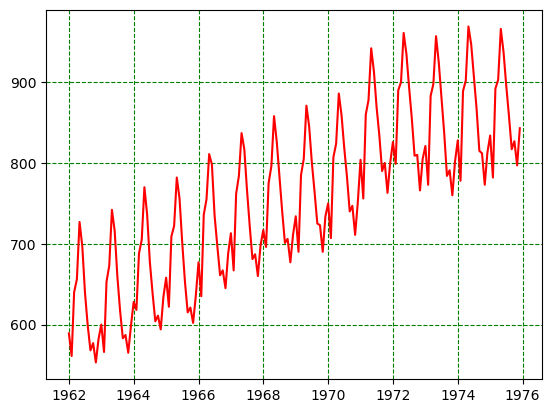

In [10]:
plt.plot(mp,color='red')
plt.grid(color="green",linestyle="--") 

In [11]:
mp_log=np.log(mp)

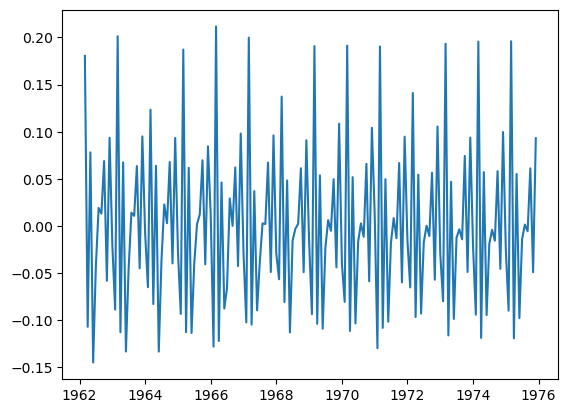

In [12]:
plt.plot(mp_log.diff().diff())

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

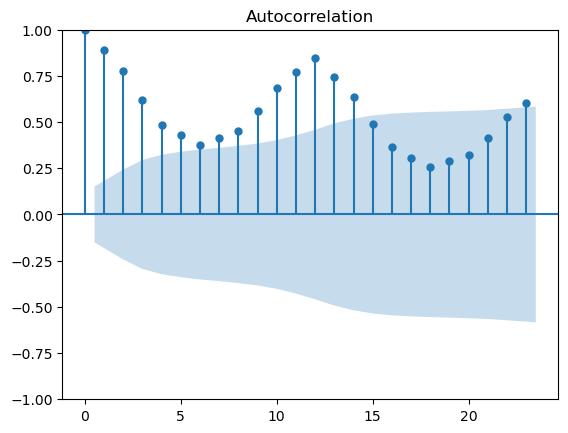

In [14]:
plot_acf(mp);

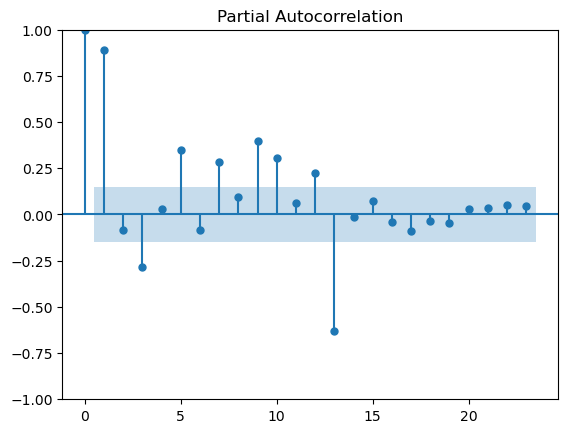

In [15]:
plot_pacf(mp);

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from pmdarima import auto_arima

In [20]:
auto_arima(mp_log,seasonal=True,m=12)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# passsing the values form AARIMA 

In [22]:
model1 = SARIMAX(mp_log["Production"],order=(1,1,0),seasonal_order=(2,0,1,12))

In [23]:
result = model1.fit()

In [25]:
pred_mp=result.predict(start=168,end=191)# predcting upcomming 24 months
pred_mp

1976-01-01    6.765461
1976-02-01    6.706201
1976-03-01    6.835330
1976-04-01    6.849933
1976-05-01    6.918023
1976-06-01    6.889222
1976-07-01    6.844097
1976-08-01    6.798555
1976-09-01    6.742606
1976-10-01    6.748574
1976-11-01    6.705306
1976-12-01    6.758230
1977-01-01    6.786846
1977-02-01    6.727362
1977-03-01    6.856345
1977-04-01    6.870769
1977-05-01    6.938658
1977-06-01    6.909823
1977-07-01    6.864827
1977-08-01    6.819528
1977-09-01    6.764138
1977-10-01    6.770471
1977-11-01    6.727692
1977-12-01    6.780686
Freq: MS, Name: predicted_mean, dtype: float64

In [26]:
pred_mp_oring=np.round(np.exp(pred_mp))

In [27]:
pred_mp_oring=pd.DataFrame(pred_mp_oring)

pred_mp_oring.columns=["Production"]
pred_mp_oring.head(2)

,Production
1976-01-01,867.0
1976-02-01,817.0


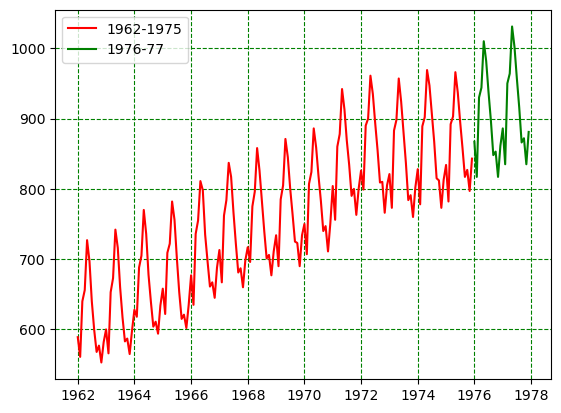

In [28]:
plt.plot(mp.Production,color="red",label="1962-1975")
plt.plot(pred_mp_oring.Production,color="green",label="1976-77")
plt.grid(color="green",linestyle="--")
plt.legend()

### The plot shows a steady increase in production from 1962 to 1977 with consistent seasonal patterns. 
### Production levels in 1976-1977 are higher than in 1962-1975, indicating overall growth.